## Monte Carlo Approach to Gauge Block Length Determination at Room Temperature for readings obtained from Laser Interferometer

## Aim

To visualize the probability density function (PDF) of the gauge block lengths at room temperature using a histogram generated from Monte Carlo simulations. Additionally, we aim to determine the 95% confidence intervals for these lengths.

## Theory

Monte Carlo simulation is a powerful technique that leverages the propagation of distributions. It offers richer information compared to the GUM method by incorporating the convolution of the input quantities' probability distributions.

In the context of Problem 9, the input variables possessed the following distributions:

* **Normal Distribution:** This distribution represents the repeated measurements obtained from the Laser Interferometer.
* **Triangular Distribution:** This distribution, assumed for the thermal expansion coefficients, is specified in the problem statement.
* **Rectangular Distribution:** This distribution reflects the range of room temperatures.

By employing a vectorization approach, we can incorporate the thermal expansions into the gauge block lengths using the equation `Lf = Li + α * Li * ΔT`. This vectorized approach allows us to estimate the distribution of the final lengths efficiently.



### The Monte Carlo method leverages two key theorems: the Law of Large Numbers (LLN) and the Central Limit Theorem (CLT). 

1.LLN says with many random trials, the average gets closer to the true answer.  This is perfect for Monte Carlo simulations, as the numerous simulated results approach the real-world value

2.CLT adds another layer. Even if the underlying process isn't normally distributed, with enough simulations, the average outcome tends towards a normal distribution. This makes it easier to analyze the results and understand the range of possible values.


### Tools Used:

* NumPy -- Randomization and Array Creation
* Matplotlib --Plotting and Visualization
* Time -- For calculating the time for the Simulation

## Program in Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time as time

In [3]:
number_of_trials=2*10**5
Repeated_measurement_data=np.array([35.003,34.993, 35.005, 35.002, 35.001])
expansion_coeffecient_min,expansion_coeffecient_max=(11.5-3)*10**-6,(11.5+3)*10**-6
Temperature_min,Temperature_max=23.5,26.5
calibration_temperature=np.array([22]*number_of_trials)
Repeated_measurement_data_dist=np.random.normal(np.mean(Repeated_measurement_data),np.std(Repeated_measurement_data),number_of_trials)
expansion_coeffecient_dist = np.random.triangular(
    expansion_coeffecient_min,
    (expansion_coeffecient_max + expansion_coeffecient_min) * 0.5,
    expansion_coeffecient_max,
    number_of_trials
)
roomTemperature_dist=np.random.uniform(Temperature_min,Temperature_max,number_of_trials)


## MCS Running

In [4]:
start_time=time.time()
gauge_block_length_dist = (
    Repeated_measurement_data_dist +
    Repeated_measurement_data_dist * 
    expansion_coeffecient_dist * 
    (roomTemperature_dist - calibration_temperature)
)
end_time=time.time()
print(f"Time taken by the simulation to run 200000 trials is {end_time-start_time:6f} seconds")

Time taken by the simulation to run 200000 trials is 0.003002 seconds


## Plotting via Histogram and determing Confidence Intervals 

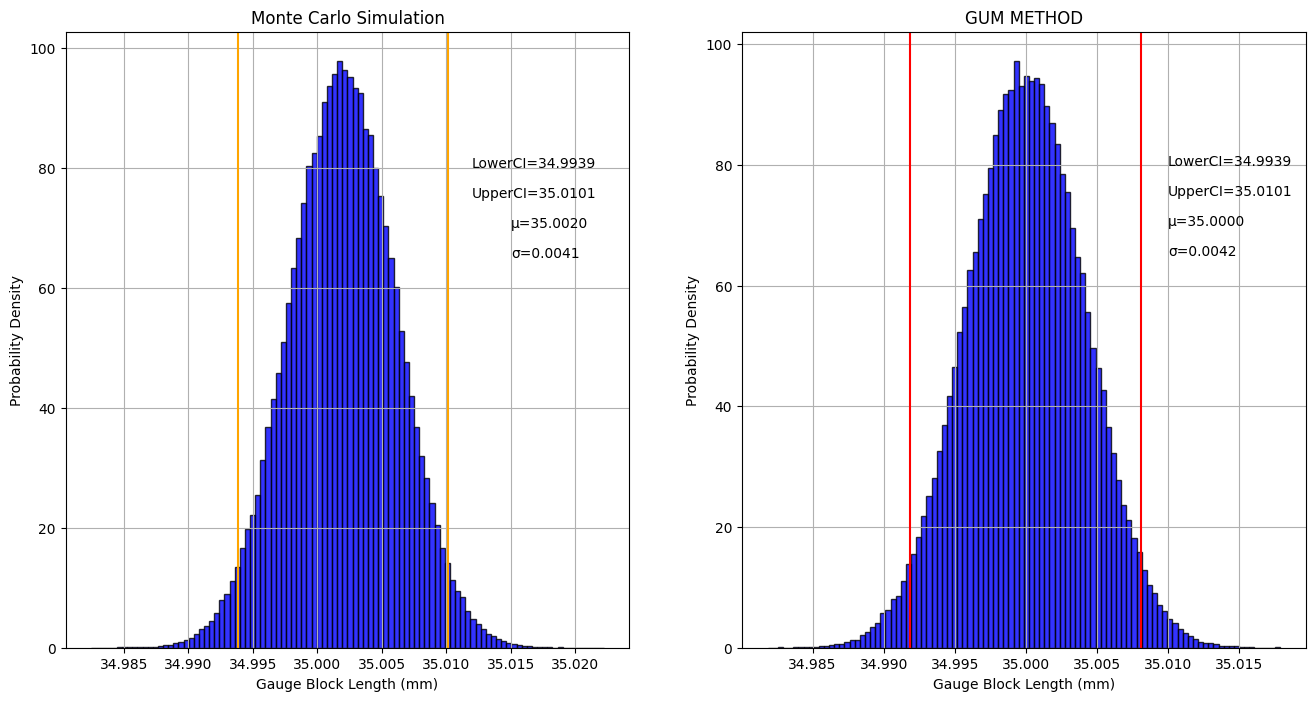

In [9]:
#MCS Plot

fig, ax1 = plt.subplots(1, 2, figsize=(16, 8))
confidence_intervals = np.percentile(gauge_block_length_dist, [2.5, 97.5])
ax1[0].hist(
    gauge_block_length_dist,
    bins=100,
    density=True,
    color="Blue",
    edgecolor='black',
    alpha=0.8
)
for i in range(len(confidence_intervals)):
    ax1[0].axvline(confidence_intervals[i], color="orange")
ax1[0].text(35.012, 80, f"LowerCI={confidence_intervals[0]:.4f}") 
ax1[0].text(35.012, 75, f"UpperCI={confidence_intervals[1]:.4f}")





# GUM Method


nominal_length=35
thermal_exp_coeff_max = 14.5e-6  
thermal_exp_coeff_min = 8.5e-6  
thermal_exp_coeff_uncertainty = 3e-6
thermal_exp_coeff_mean=11.5e-6
room_temp_uncertainty = 1.5  
room_temp_max=26.5
room_temp_min=24.5
temperature_mean=25
standard_temp=22
def thermal_expansion(thermal_exp_coeff,temperature_value):
    new_length=nominal_length*(1+thermal_exp_coeff*(temperature_value-standard_temp))
    return new_length

# sensitivity coeffecients of expansion coeffecient
length_max, length_min = (
    thermal_expansion(thermal_exp_coeff_max, temperature_mean),
    thermal_expansion(thermal_exp_coeff_min, temperature_mean)
)
senstivity_expansion=(length_max-length_min)/thermal_exp_coeff_uncertainty
# sensitivity coeffecients of temperature coeffecient
length_max, length_min = (
    thermal_expansion(thermal_exp_coeff_mean, room_temp_max),
    thermal_expansion(thermal_exp_coeff_mean, room_temp_min)
)
senstivity_temp=(length_max-length_min)/room_temp_uncertainty

#Combined Uncertainty Calculations
standard_uncertainty_temp=(room_temp_uncertainty/3**0.5)*senstivity_temp
standard_uncertainty_expansion=(thermal_exp_coeff_uncertainty/6**0.5)*senstivity_expansion
standard_uncertainty_repeatability=(np.std(Repeated_measurement_data))
combined_uncertainty = np.sqrt(
    standard_uncertainty_expansion**2 +
    standard_uncertainty_temp**2 +
    standard_uncertainty_repeatability**2
)
expanded_uncertainty=combined_uncertainty*1.96 #95% confidence interval

#Plotting Normal distribution from the result

normal_dist = np.random.normal(nominal_length,combined_uncertainty,number_of_trials)
confidence_intervals2 = np.percentile(normal_dist, [2.5, 97.5])
for i in range(len(confidence_intervals2)):
    ax1[1].axvline(confidence_intervals2[i], color="red")
ax1[1].text(35.010, 80, f"LowerCI={confidence_intervals[0]:.4f}") 
ax1[1].text(35.010, 75, f"UpperCI={confidence_intervals[1]:.4f}")
ax1[1].hist(
    normal_dist,
    density=True,
    bins=100,
    color="Blue",
    edgecolor='black',
    alpha=0.8
)
ax1[0].set_xlabel("Gauge Block Length (mm)")
ax1[1].set_xlabel("Gauge Block Length (mm)")
ax1[1].set_ylabel("Probability Density")
ax1[0].set_ylabel("Probability Density")
ax1[1].set_title('GUM METHOD')
ax1[0].set_title('Monte Carlo Simulation')
ax1[0].text(35.015, 70 ,f"μ={np.mean(gauge_block_length_dist):.4f}") 
ax1[1].text(35.010, 70 ,f"μ={np.mean(normal_dist):.4f}") 
ax1[0].text(35.015, 65, f"σ={np.std(gauge_block_length_dist):.4f}")  
ax1[1].text(35.010, 65, f"σ={np.std(normal_dist):.4f}")  

ax1[0].grid(True)
ax1[1].grid(True)

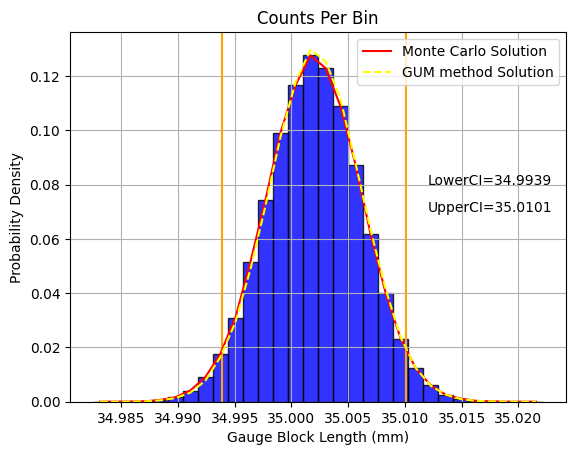

In [6]:
#Plotting Count Per Bins for Both distributions

fig, ax2 = plt.subplots()
counts, bins_edges = np.histogram(gauge_block_length_dist,bins=30)
confidence_intervals = np.percentile(gauge_block_length_dist, [2.5, 97.5])
bin_probability = counts/float(counts.sum())
bin_middles=((bins_edges[1:]+bins_edges[:-1])/2)
bin_width=bins_edges[1] - bins_edges[0]
ax2.bar(
    bin_middles,
    bin_probability,
    width=bin_width,
    color='blue',
    edgecolor='black',
    alpha=0.8
)
for i in range(len(confidence_intervals)):
    plt.axvline(confidence_intervals[i], color="orange")

ax2.plot(bin_middles,bin_probability,color='red',label="Monte Carlo Solution")
plt.text(35.012, 0.08, f"LowerCI={confidence_intervals[0]:.4f}") 
plt.text(35.012, 0.07, f"UpperCI={confidence_intervals[1]:.4f}")  
 

counts, bins_edges = np.histogram(normal_dist,bins=30)
# Normalize the counts to represent probability density
bin_probability = counts/float(counts.sum())
#Gaussian Plot for result from GUM method
ax2.plot(
    bin_middles,
    bin_probability,
    color='yellow',
    linestyle='--',
    label="GUM method Solution"
)
ax2.legend()

plt.xlabel("Gauge Block Length (mm)")
plt.ylabel("Probability Density")
ax2.set_title('Counts Per Bin')
plt.grid(True)

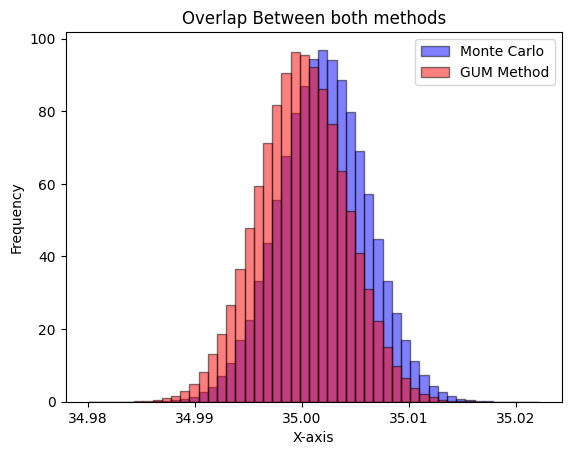

In [7]:
fig, ax = plt.subplots()
bins = np.linspace(
    min(gauge_block_length_dist.min(), normal_dist.min()),
    max(gauge_block_length_dist.max(), normal_dist.max()),
    num=50
)

hist1, bins1, patches1 = ax.hist(
    gauge_block_length_dist,
    bins=bins,
    color='blue',
    alpha=0.5,
    edgecolor='black',
    label='Monte Carlo',
    density=True
)

hist2, bins2, patches2 = ax.hist(
    normal_dist,
    bins=bins,
    color='red',
    alpha=0.5,
    edgecolor='black',
    label='GUM Method',
    density=True
)


ax.set_xlabel('X-axis')
ax.set_ylabel('Frequency')
ax.set_title('Overlap Between both methods')
ax.legend()
plt.show()

In [8]:
combined_uncertainty_mcs=np.std(gauge_block_length_dist)
expanded_uncertainty=combined_uncertainty*1.96
print(f"Expanded Uncertainity obtained from MCS is {expanded_uncertainty}")

Expanded Uncertainity obtained from MCS is 0.00813864088489684


## Results

The histogram visualizes the probability density function (PDF) of the gauge block lengths after incorporating the thermal expansion factor and all other uncertainties from a distribution obtained via Monte Carlo simulation.

Time Taken: For the Monte Carlo simulation so process 200000 Trials is **0.008010 seconds**

The expanded uncertainty is 0.00813, and the estimated bias is 35.002. Therefore, the reported reading is **[35.002 ± 0.00813]**.

The 95% confidence intervals for the gauge block lengths are:

* Upper CI: 35.0101  
* Lower CI: 34.9939

### Plots

1.)
Both the upper and lower confidence limits were found same upto 4-decimal places when done with GUM and MCS when their individual histograms were plotted

2.)
Counts per Bin plot were generated for both the GUM method and the Monte Carlo simulation (MCS) method. The close resemblance between these plots suggests that the Monte Carlo simulation is a highly reliable and accurate alternative to the GUM method.

3.)
Finally Overlap between the GUM method and MCS method is shown in the last plot the slight variations of the GUM plot may be attributed to the fact that beacuse of has Non-Gaussian distribution of two inputs 


## Discussion

### Motivation for using Monte Carlo Simulations

The results obtained from the Monte Carlo simulation (MCS) method leverage the concept of propagation of distributions, while the GUM method relies on the propagation of uncertainties. 

We favor using Monte Carlo simulations in scenarios involving:


* **Complex Systems:** When dealing with intricate systems with numerous interacting variables, MCS can provide a more accurate representation of the overall uncertainty.

* **Nonlinear Equations:** If the equations governing the system are nonlinear, MCS can effectively account for these nonlinearities, leading to more reliable results compared to the GUM method which assumes linearity.

* **Diverse Input Distributions:** When the input variables possess various distribution types (not necessarily Gaussian), MCS can handle these non-Gaussian distributions more effectively, leading to a more accurate estimation of the final uncertainty.


In Problem 9, two out of the three input variables followed non-Gaussian distributions. This strongly suggests that the MCS method would yield a more accurate estimate of the final uncertainty compared to the GUM method, which is better suited for linear systems with Gaussian inputs and this fact was indeed backed by our plot results

### Sources of Uncertainty in Problem 9

Factors contributing to the uncertainties:

* **Environmental Conditions:** Fluctuations in environmental factors like temperature can introduce uncertainties into the measurements.

* **Repeatability and Reproducibility:** Variations in the ability to consistently replicate measurements (repeatability) and obtain the same results from different laboratories (reproducibility) can contribute to uncertainty.

* **Coefficient Uncertainty:** Uncertainties associated with the values of the coefficients used in the calculations can also introduce uncertainty into the final results.
